In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read the dataset
dataset_train = pd.read_csv("AAPL.csv")

# Extract the training data
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_set = scaler.fit_transform(training_set)

# Creating the training data
X_train = []
y_train = []
for i in range(60, len(scaled_training_set)):
    X_train.append(scaled_training_set[i-60:i, 0])
    y_train.append(scaled_training_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping X_train
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

regressor = Sequential()

# First LSTM layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Output layer
regressor.add(Dense(units=1))

# Compiling the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the model
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

# Prediction
dataset_test = pd.read_csv("AAPL.csv")
actual_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


c:\Users\oruga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.3072
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0903
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0671
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0517
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0491
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0487
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0415
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0451
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0474
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0345
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0350
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0384
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0325
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0315
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0323
Epoch 16/100
6/6 ━━

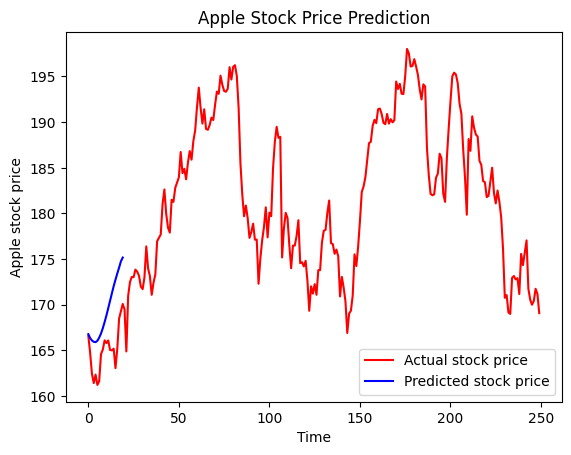

In [8]:
import matplotlib.pyplot as plt

plt.plot(actual_stock_price[:250], color='red', label='Actual stock price')
plt.plot(predicted_stock_price[:250], color='blue', label='Predicted stock price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple stock price')
plt.legend()
plt.show()




In [9]:
print("Shape of actual_stock_price:", actual_stock_price.shape)
print("Shape of predicted_stock_price:", predicted_stock_price.shape)

# Print the first few values of actual_stock_price and predicted_stock_price
print("Actual stock price:", actual_stock_price[:10])
print("Predicted stock price:", predicted_stock_price[:10])


Shape of actual_stock_price: (252, 1)
Shape of predicted_stock_price: (20, 1)
Actual stock price: [[166.600006]
 [164.740005]
 [162.429993]
 [161.419998]
 [162.350006]
 [161.220001]
 [161.630005]
 [164.589996]
 [165.089996]
 [166.100006]]
Predicted stock price: [[166.77696]
 [166.35033]
 [166.08676]
 [165.94046]
 [165.90497]
 [166.05388]
 [166.39816]
 [166.85246]
 [167.42899]
 [168.1042 ]]


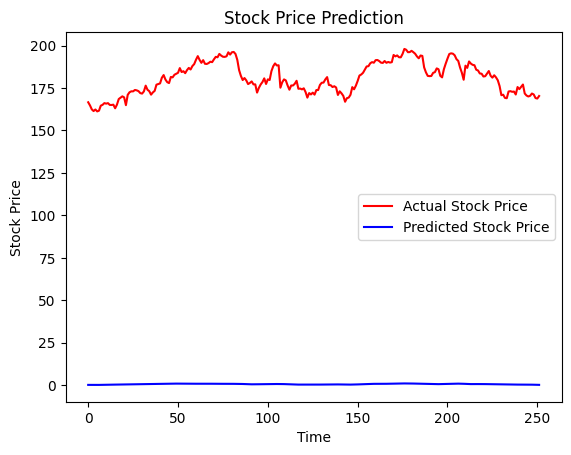

In [21]:
import matplotlib.pyplot as plt

# Plot the actual and predicted stock prices
plt.plot(actual_stock_price, color='red', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [10]:
X_test = []
for i in range(60, 250):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [11]:
X_test = []
for i in range(60, 312):  # Adjusted to cover 252 time steps starting from 60
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


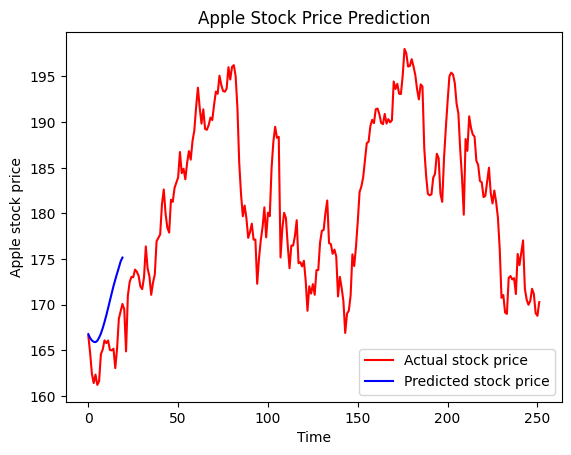

In [15]:
import matplotlib.pyplot as plt

plt.plot(actual_stock_price, color='red', label='Actual stock price')
plt.plot(predicted_stock_price, color='blue', label='Predicted stock price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple stock price')
plt.legend()
plt.show()


In [13]:
print("Shape of X_test:", X_test.shape)
print("Shape of predicted_stock_price:", predicted_stock_price.shape)

# Print the first few values of predicted_stock_price
print("Predicted stock price:", predicted_stock_price[:10])


Shape of X_test: (252, 60, 1)
Shape of predicted_stock_price: (20, 1)
Predicted stock price: [[166.77696]
 [166.35033]
 [166.08676]
 [165.94046]
 [165.90497]
 [166.05388]
 [166.39816]
 [166.85246]
 [167.42899]
 [168.1042 ]]


In [14]:
# Constructing X_test to cover the full test dataset
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [6]:
X_test = []
for i in range(60, 250):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [3]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [4]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [16]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [17]:
predicted_stock_price = regressor.predict(X_test)
print("Shape of predicted_stock_price:", predicted_stock_price.shape)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Shape of predicted_stock_price: (252, 1)


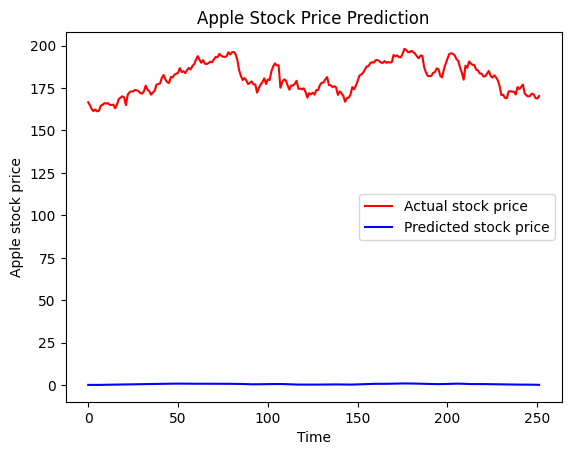

In [25]:
plt.plot(actual_stock_price, color='red', label='Actual stock price')
plt.plot(predicted_stock_price, color='blue', label='Predicted stock price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple stock price')
plt.legend()
plt.show()


In [26]:
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step, 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)


In [28]:
# Check the shape of X_test before reshaping
print("Shape of X_test before reshaping:", X_test.shape)

# Reshape the data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Check the shape of X_train after reshaping
print("Shape of X_train after reshaping:", X_train.shape)

# Reshape X_test if necessary
if len(X_test.shape) == 2:
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Check the shape of X_test after reshaping
print("Shape of X_test after reshaping:", X_test.shape)


Shape of X_test before reshaping: (0,)
Shape of X_train after reshaping: (141, 60, 1)
Shape of X_test after reshaping: (0,)


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Assuming X_train and y_train are your datasets prepared in the previous steps
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\oruga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.fit(X_train, y_train, batch_size=32, epochs=100)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.4434
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0588
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0635
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0415
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0391
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0300
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0269
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0315
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0283
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0319
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0284
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0295
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0279
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0250
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0265
Epoch 16/100
5/5 ━━

In [33]:
print(X_test.shape)
print(X_test)


(0,)
[]


In [34]:
print(X_test.shape)


(0,)


In [35]:
if len(X_test.shape) == 2:  # Assuming it should have one feature per time step
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [37]:
import pandas as pd

# Load the dataset
data = pd.read_csv('AAPL.csv')
print("Dataset loaded successfully.")
print("Dataset shape:", data.shape)


Dataset loaded successfully.
Dataset shape: (252, 7)


In [38]:
# Display the first few rows of the dataset
print(data.head())

# Check for any missing values
print(data.isnull().sum())


         Date        Open        High         Low       Close   Adj Close  \
0  2023-04-04  166.600006  166.839996  165.110001  165.630005  164.750610   
1  2023-04-05  164.740005  165.050003  161.800003  163.759995  162.890549   
2  2023-04-06  162.429993  164.960007  162.000000  164.660004  163.785767   
3  2023-04-10  161.419998  162.029999  160.080002  162.029999  161.169724   
4  2023-04-11  162.350006  162.360001  160.509995  160.800003  159.946259   

     Volume  
0  46278300  
1  51511700  
2  45390100  
3  47716900  
4  47644200  
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [39]:
from sklearn.model_selection import train_test_split

# Assuming you are predicting the 'Close' price based on prior 'Close' prices
features = data[['Close']]  # You might want to include more features
target = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (201, 1)
Testing set shape: (51, 1)


import numpy as np

# Reshape for LSTM [samples, time steps, features]
X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))
